In [1]:
from plants import *
import matplotlib.pyplot as plt
import numpy as np

In [8]:
plants, datasets = generate_beta_plants_and_datasets(500, 500, N_u_discrete=50, gamma)

(-1, 1)

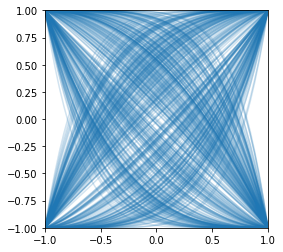

In [9]:
fig = plt.figure(figsize=(4, 4))
u = np.arange(-1, 1, 0.01)
for p in plants:
    plt.plot(u, p.f(0, u), color='C0', alpha=0.2)
plt.xlim([-1, 1])
plt.ylim([-1, 1])

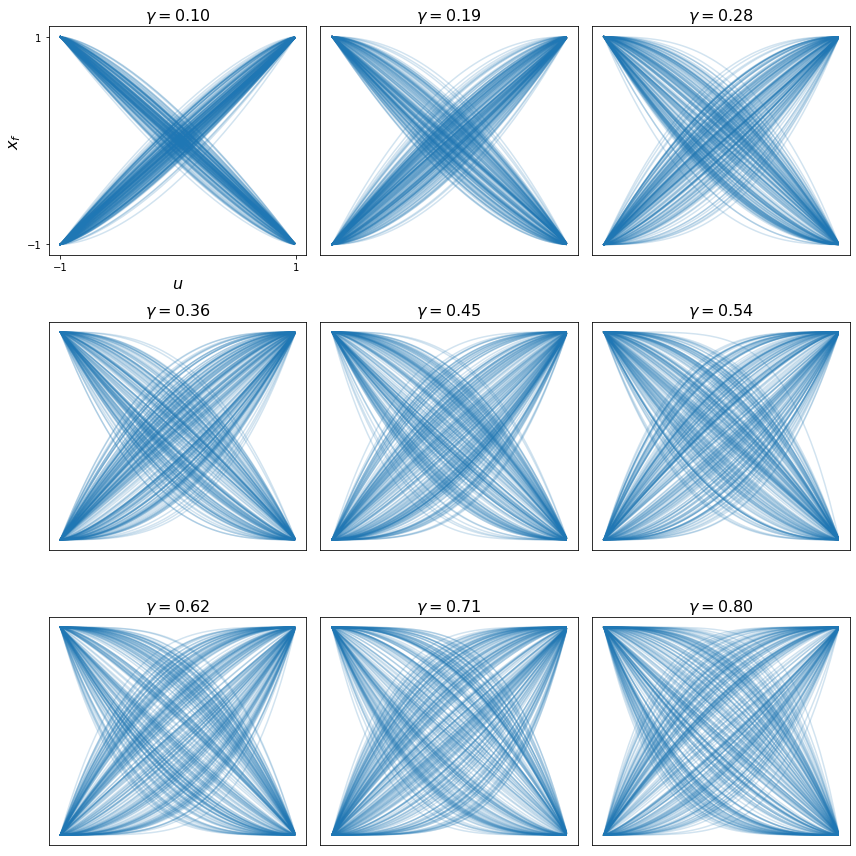

In [8]:
n_plots = 9
gammas = np.linspace(0.1, 0.8, n_plots)
#gammas = 
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
for i_gamma, gamma in enumerate(gammas):
    plants, datasets = generate_beta_plants_and_datasets(300, 500, N_u_discrete=50, gamma=gamma)
    u = np.arange(-1, 1, 0.01)
    for p in plants:
        ax[i_gamma//3, i_gamma%3].plot(u, p.f(0, u), color='C0', alpha=0.2)
        ax[i_gamma//3, i_gamma%3].set_title('$\gamma = {0:.2f}$'.format(gamma), fontsize=16)
        ax[i_gamma//3, i_gamma%3].set_xticks([])
        ax[i_gamma//3, i_gamma%3].set_yticks([])
ax[0,0].set_xlabel('$u$', fontsize=16)
ax[0,0].set_ylabel('$x_f$', fontsize=16)
ax[0,0].set_xticks([-1, 1])
ax[0,0].set_yticks([-1, 1])
plt.tight_layout()
fig.savefig('/Users/omarschall/daily_reports/report_2023-05-01_CB_interim_summary/figs/onions.pdf')

In [26]:
from scipy.stats import norm

class Gaussian_Tuning_Curves:
    """Instance of gaussian tuning curves"""
    
    def __init__(self, means, stds):
        """Initialize by specifying the means and the stds of the
        turning curves. Must have same shape of (n)."""
        
        self.means = means
        self.stds = stds
        
    def __call__(x):
        """For a given vector, represents each float in the vector
        as a list of tuning curve activations, then concatenates the results."""
        
        return norm.pdf(x.reshape(-1,1), loc=self.means, scale=self.stds).reshape(-1)

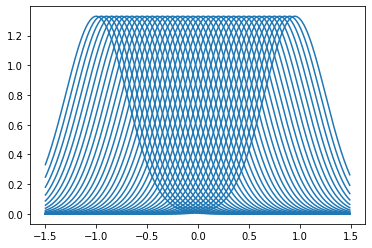

In [5]:
means = np.arange(-1, 1, 0.05)
stds = np.ones_like(means) * 0.3
x = np.arange(-1.5, 1.5, 0.01)
for mean, std in zip(means, stds):
    plt.plot(x, norm.pdf(x, loc=mean, scale=std), color='C0')

In [7]:
x = np.array([0.3, 0.2])
plt.plot(means, norm.pdf(x, loc=means, scale=stds))

ValueError: operands could not be broadcast together with shapes (2,) (40,) 

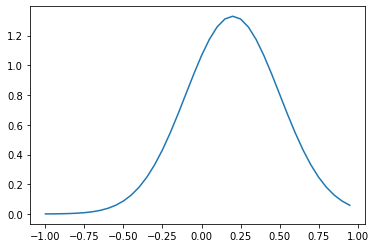

In [25]:
plt.plot(np.concatenate([means]*2)[40:], norm.pdf(x.reshape(-1, 1), loc=means, scale=stds).reshape(-1, order='C')[40:])

In [22]:
means.shape

(40,)